# Configurações e Arquivos Iniciais

In [15]:
import unidecode
import pickle
import pandas as pd
import matplotlib.pyplot as plt

# Stopwords
from nltk.corpus import stopwords

# Metricas e algoritmos para validacao
from sklearn import model_selection
from sklearn.metrics import mean_squared_error, make_scorer

# Text feature extractor
from sklearn.feature_extraction.text import TfidfVectorizer

# Regression models
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.ensemble import AdaBoostRegressor, BaggingRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

In [ ]:
# Configurações pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_colwidth', 500)

In [8]:
df_tweets_pre = pd.read_json(path_or_buf='outputs/tweets_pre_regr.json', orient='records')
df_tweets_pre = df_tweets_pre[['tweet', 'sentimentos']].copy()

In [9]:
df_tweets_pre.head(20)

tweet  \
0       ola, victor! sua duvida e tecnica. por favor, ligue para o nosso service: -762-2237, de segunda a domingo, das h as h.   
1               poxa, a procura por ele e tao grande, que esgotou dos nossos estoques da loja online, mas voce consegue enc...   
2   ian, no momento, estamos analisando a demanda do mercado. continue ligado em nossas redes sociais, sempre divulgamos as...   
3                                                                                                            barraca do beijo!   
4                                         own ... que coisa mais fofinhaa! a gente vai compartilhar com nosso time, ta?! &lt;3   
5                                                                                               boa, igor. aproveite seu nike!   
6                                                                           nao perca a esperanca, miga! ainda tem muito jogo!   
7                                                                                        as indiretas nunca falham. hahahahaha   
8         seu desejo foi ouvido, viu? vem nos fazer uma visiitnha pra conhecer o coffee man! ;) a gente vai adorar te receber!   
9                  hahahaha melhor que pipoca seria oq? aquela mcoferta do mcdonald's junto dessa coca-cola geladinha! ai s...   
10                                                                        nao entendemos sua duvida, no que podemos te ajudar?   
11                    como as emocoes afetam a jogabilidade? dan himmelstein explica pra gente no training room. veja aqui:...   
12      quem e demogorgon na fila do pao? agora o pessoal de hawkins vai conhecer um terror de verdade: uma praca de alimen...   
13                                                                         se eu ja nao aguento mais esperar, imagino voces...   
14                         oi, ! se precisar, ligue no -2237 (seg a dom, das h as h) e converse com nossos tecnicos. obrigado!   
15                                                                                          mimos direto de green gables &lt;3   
16                                                                                                 ai eu sei sim, viu? haha ;)   
17                                                                  a gente acredita nessa virada, ana! pra continuar na copa!   
18                                                                      ja estamos com saudades dessa copa, heitor! foi demais   
19                eita! como assim, leonardo? o produto ainda esta com voce? se sim, manda uma dm pra gente para resolvermo...   

    sentimentos  
0       0.00000  
1       0.25455  
2      -0.15310  
3       0.36120  
4       0.00000  
5       0.44040  
6       0.38180  
7       0.00000  
8       0.40190  
9      -0.13660  
10     -0.04185  
11      0.00000  
12      0.00000  
13      0.12800  
14      0.00000  
15      0.00000  
16      0.59940  
17      0.91360  
18     -0.07655  
19      0.00000

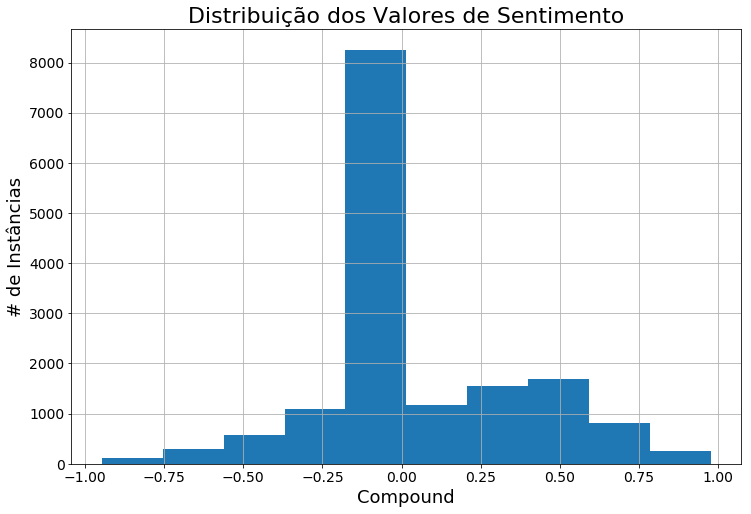

In [25]:
df_tweets_pre['sentimentos'].hist(xlabelsize=14, ylabelsize=14, figsize=(12, 8))

plt.xlabel("Compound", fontsize=18)
plt.ylabel("# de Instâncias", fontsize=18)
plt.title("Distribuição dos Valores de Sentimento", fontsize=22)
plt.show()

A figura mostra que há uma grande concentração de sentimentos neutros nas bases (arquivos jsons) utilizadas.

# Extração de Atributos

In [58]:
tpl_tweets = [tuple(x) for x in df_tweets_pre.values]
X = np.array([x[0] for x in tpl_tweets])
y = np.array([x[1] for x in tpl_tweets])

In [59]:
print(X)
print(y)

['ola, victor! sua duvida e tecnica. por favor, ligue para o nosso service: -762-2237, de segunda a domingo, das h as h.'
 'poxa, a procura por ele e tao grande, que esgotou dos nossos estoques da loja online, mas voce consegue enc...'
 'ian, no momento, estamos analisando a demanda do mercado. continue ligado em nossas redes sociais, sempre divulgamos as...'
 ... 'essa novidade ta demais, ne? se joga nesse amor!'
 'poxa, devido ao sucesso da promocao, muitas lojas em todo o brasil ja estao com os estoques esgotados....'
 'boa tarde! teremos novidades a partir do proximo dia . fique ligado e garanta o seu!']
[ 0.       0.25455 -0.1531  ...  0.1027   0.       0.2463 ]


In [60]:
%%time
stop_words = [unidecode.unidecode(x) for x in stopwords.words('portuguese')]

vectorizer = TfidfVectorizer(
    sublinear_tf=True, max_df=0.25, stop_words=stop_words, ngram_range=(1, 1))

X = vectorizer.fit_transform(X)

CPU times: user 196 ms, sys: 0 ns, total: 196 ms
Wall time: 189 ms


# Seleção do Melhor Modelo de Regressão

In [73]:
# prepare models
models = []
models.append(('XGB', XGBRegressor()))
# models.append(('CBR', CatBoostRegressor()))
models.append(('ABR', AdaBoostRegressor()))
models.append(('BR', BaggingRegressor()))
models.append(('GBR', GradientBoostingRegressor()))
models.append(('KNR', KNeighborsRegressor()))
models.append(('LASSO', Lasso()))
models.append(('SVR', SVR()))
models.append(('DTR', DecisionTreeRegressor()))

In [74]:
models

[('XGB', XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
         colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
         max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
         n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
         reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
         silent=True, subsample=1)),
 ('ABR',
  AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
           n_estimators=50, random_state=None)),
 ('BR', BaggingRegressor(base_estimator=None, bootstrap=True,
           bootstrap_features=False, max_features=1.0, max_samples=1.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)),
 ('GBR',
  GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
               learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
               max_leaf_nodes=None, min_impurity_dec

In [75]:
# evaluate each model in turn
results = []
names = []
scoring = make_scorer(mean_squared_error)
seed = 29

for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring, n_jobs=-1)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

XGB: 0.084102 (0.002641)
ABR: 0.087779 (0.002783)
BR: 0.092892 (0.002875)
GBR: 0.083876 (0.002524)
KNR: 0.107981 (0.003107)
LASSO: 0.089456 (0.002525)
SVR: 0.089584 (0.002378)
DTR: 0.135060 (0.005407)


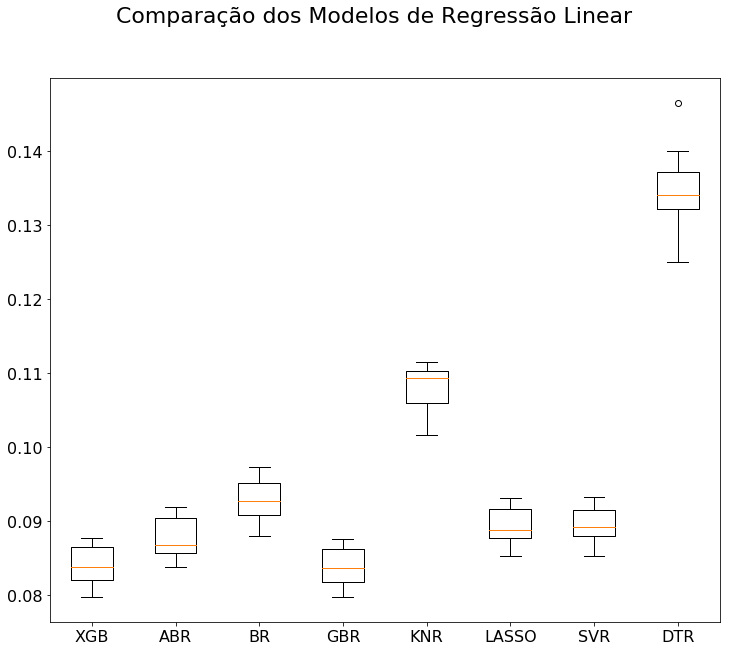

In [86]:
# boxplot algorithm comparison
fig = plt.figure(figsize=(12, 10))
fig.suptitle('Comparação dos Modelos de Regressão Linear', fontsize=22)
ax = fig.add_subplot(111)

plt.boxplot(results)
ax.set_xticklabels(names, fontsize=16)

plt.yticks(fontsize=16)
plt.show()

Entre os modelos criados com os valores default dos algoritmos de regressão, o XGB e o GBR foram os que obtiveram melhores resultados. Foi escolhido o XGB devido ao tempo que ele leva para se treinado.

# Salvando o Melhor Modelo de Regressão

* WIP: Realizar a otimização dos parâmetros do XGBoostRegressor..

In [88]:
modelo = XGBRegressor()

In [89]:
scoring = make_scorer(mean_squared_error)

modelo.fit(X, y, eval_metric=scoring)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

A seguir, a matriz esparsa referente aos tweets e o modelo de regressão XGBoost são salvos para uso futuro:

In [92]:
# Salvando a matriz esparsa
filename = 'outputs/tfidf_vec.sav'
pickle.dump(vectorizer, open(filename, 'wb'))

In [94]:
# Salvando o XGBoostRegressor
filename = 'outputs/xgboost_regressor.sav'
pickle.dump(modelo, open(filename, 'wb'), protocol=2)